# PET/CT 

## CT
>A CT scan makes use of computer-processed combinations of many X-ray images taken from different angles to produce cross-sectional (tomographic) images (virtual "slices") of specific areas of a scanned object, allowing the user to see inside the object without cutting. Other terms include computed axial tomography (CAT scan) and computer aided tomography.

From https://en.wikipedia.org/wiki/CT_scan
## PET

>Positron emission tomorgraphy (PET) is a nuclear medicine technique that is used to observce metabolic processess in the body. The system detects pairs of gamma rays emitted indirectly by a positron->emitting radionuclide (tracer), which is introduced into the body on a biologically active molecule. Three-dimensional images of tracer concentration within the body are then constructed by computer >analysis. In modern PET-CT scanners, three dimensional imaging is often accomplished with the aid of a CT X-ray scan performed on the patient during the same session, in the same machine.

From https://en.wikipedia.org/wiki/Positron_emission_tomography

## Images

Images are taken on a slice per slice basis. Let's load the CT, PET and Label image.

In [1]:
# boring imports
import os
import h5py
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# which patient to load
patient_index = 0
# to load from a hdf5 file
with h5py.File(os.path.join('..', 'input', 'lab_petct_vox_5.00mm.h5'), 'r') as p_data:
    id_list = list(p_data['ct_data'].keys())
    ct_image = p_data['ct_data'][id_list[patient_index]].value
    pet_image = p_data['pet_data'][id_list[patient_index]].value
    tumor_label = p_data['label_data'][id_list[patient_index]].value

Now lets view the shape and dimensions of the images

In [3]:
print('ct shape', ct_image.shape)
print('pet shape', pet_image.shape)
print('label shape', tumor_label.shape)
print('--------------------------------')
print('Axis are z, x, y')

('ct shape', (175, 100, 100))
('pet shape', (175, 100, 100))
('label shape', (175, 100, 100))
--------------------------------
Axis are z, x, y


### CT Images
As we see, all the images are 2d images (100x100) with 175 slices. Ok lets view one slice of the CT images.

(100, 100)


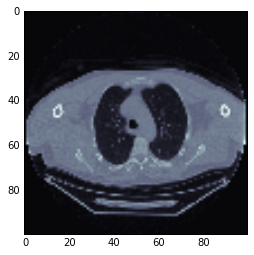

In [13]:
# flip to start from head and goes down to the feet
first_image = ct_image[::-1][40]
print(first_image.shape)
plt.imshow(first_image, cmap='bone')

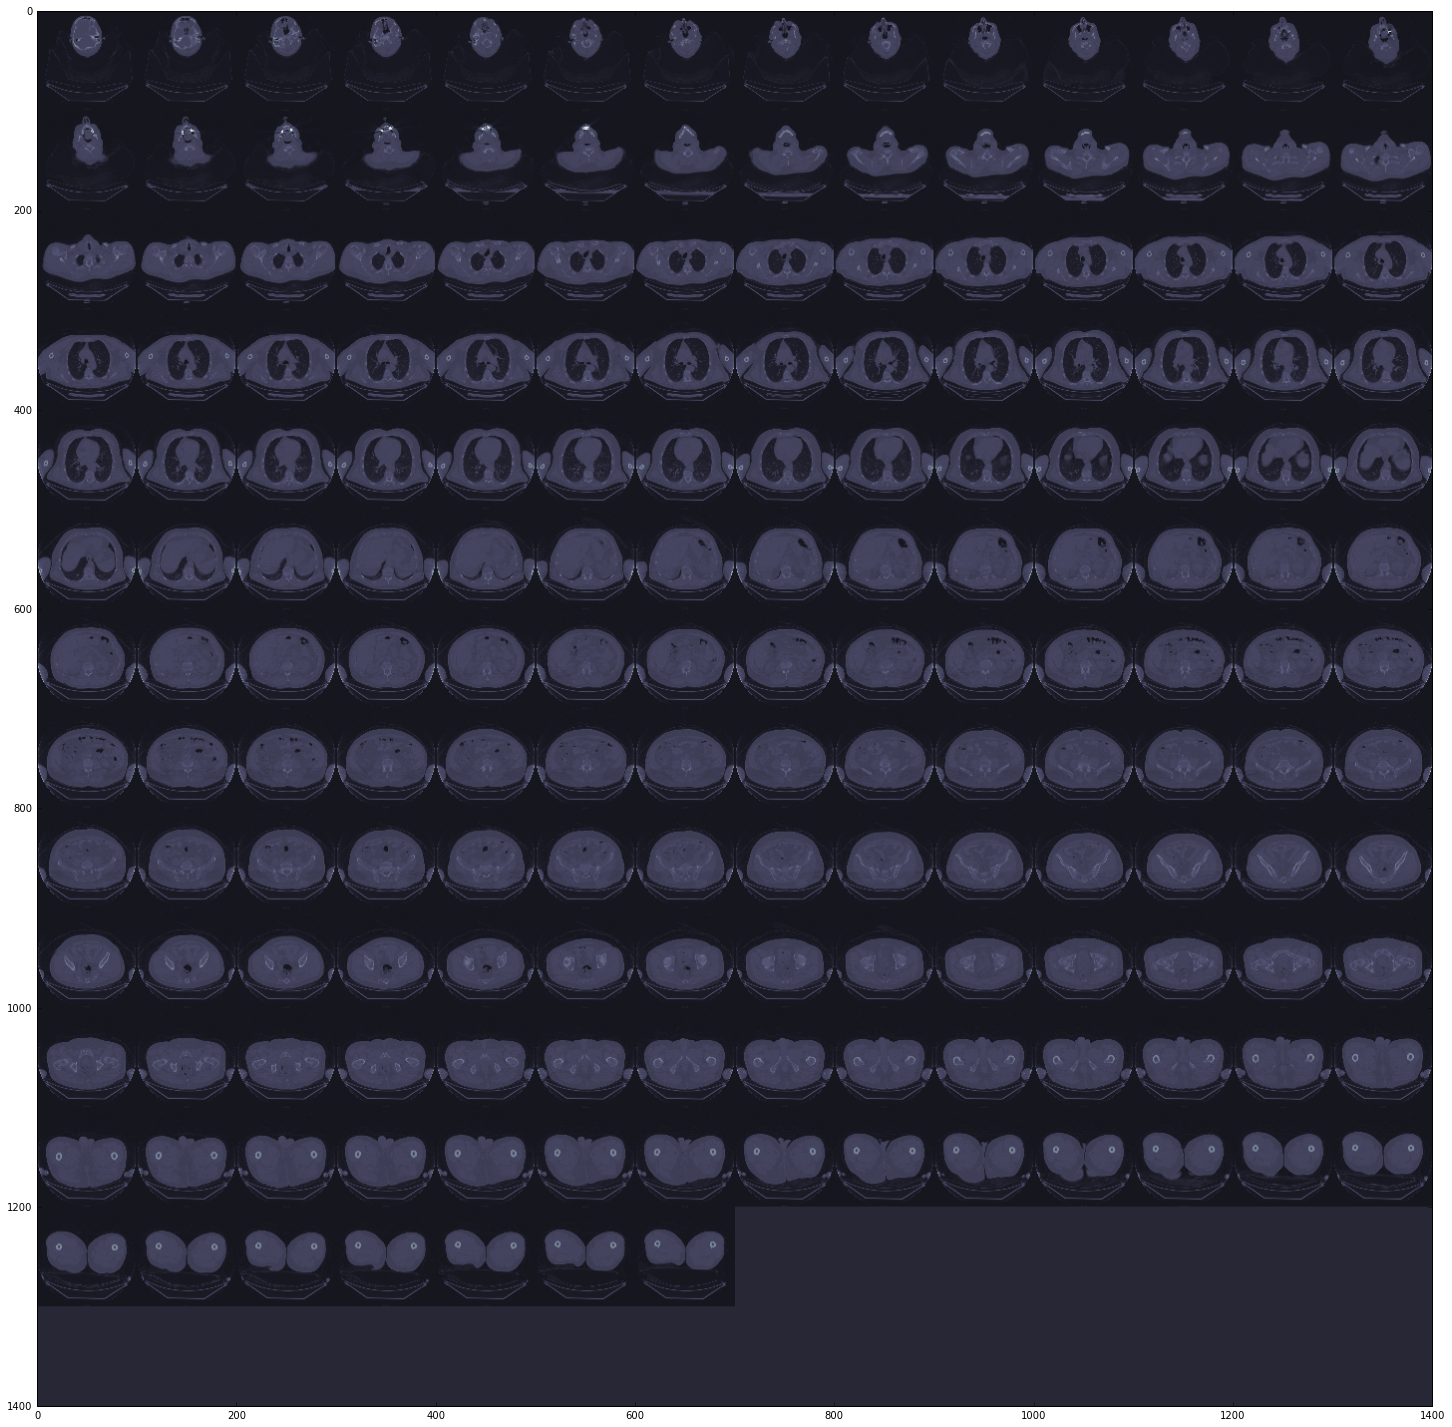

In [5]:
from skimage.util.montage import montage2d
ct_montage = montage2d(ct_image[::-1])
fig, ax = plt.subplots(figsize=(25, 25))
ax.imshow(ct_montage, cmap='bone', aspect='auto')

#### Sagital view
Because the CT and PET and Label images are volumes we can also switch from the _axial_ view to the _sagital_ view.

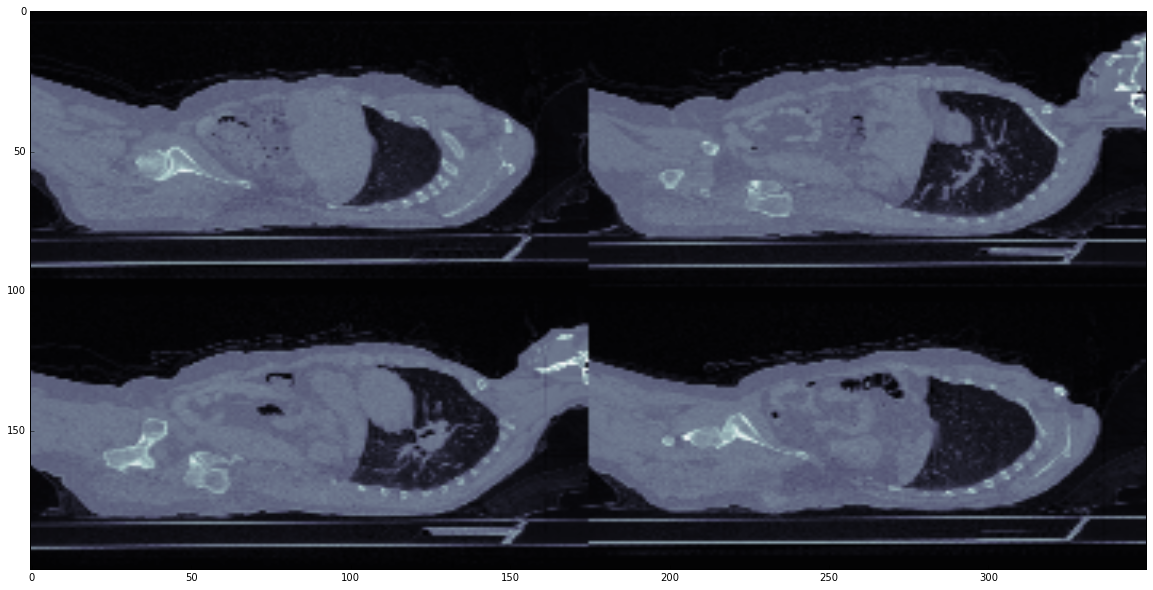

In [9]:
sagital = np.swapaxes(ct_image, 2, 0)

#Show a sample image of the sagital view
sample = np.stack([sagital[30], sagital[40], sagital[60], sagital[70]])
sagital_montage = montage2d(sample)
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(sagital_montage, cmap='bone', aspect='auto')

#### Coronal view
Now lets view some coronal view examples.

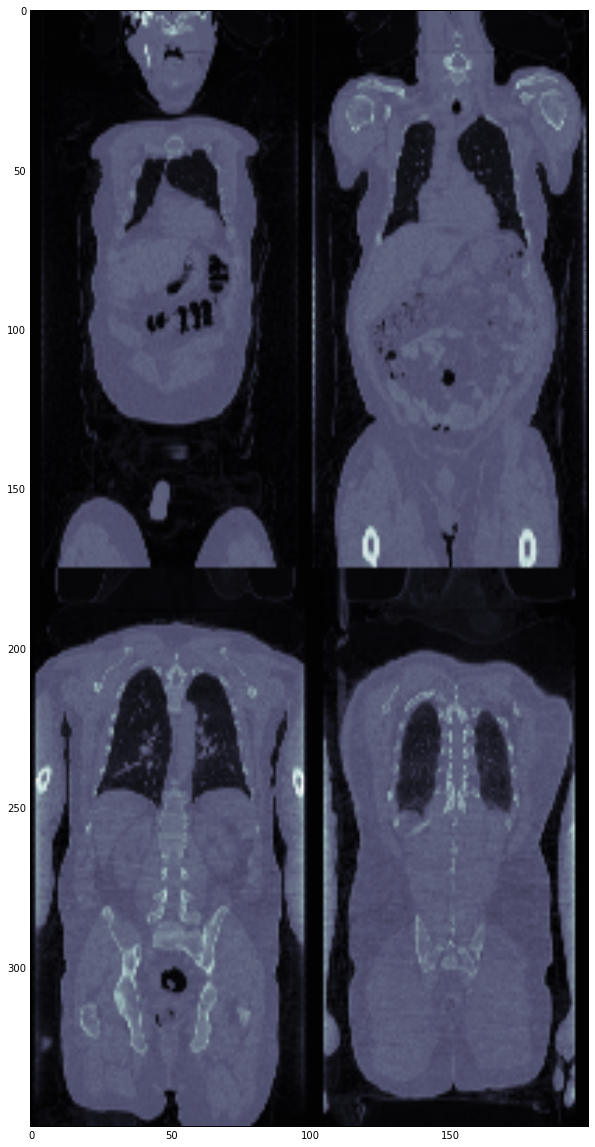

In [12]:
coronal = np.swapaxes(ct_image[::-1], 1, 0)

#Show a sample image of the sagital view
sample = np.stack([coronal[30], coronal[40], coronal[60], coronal[70]])
sagital_montage = montage2d(sample)
fig, ax = plt.subplots(figsize=(10, 20))
ax.imshow(sagital_montage, cmap='bone', aspect='auto')